## Note:
If animation does not work, restart kernel and run only relevant cells. There may be some glitching in animation if multiple animations are running simultaneously.

I have made use of `matplotlib, numpy` and `sympy` libraries in this notebook. `sympy` is used in the latter half of the assignment, where I have suggested a method to evaluate a function without specifying the derivatives.


## Imports

In [1]:
# Set up the imports
%matplotlib ipympl
!pip install sympy
import numpy as np
from numpy import cos, sin, pi, exp 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

First, we define a function `graddescfind`, which takes as input the functions that define our single variable function and derivative, starting point and learning rate. It returns the value of x (independent variable of function) at which we find our minima.

In [2]:
def graddescfind(func, deri, start, alpha):
    bestx = start
    # Learning rate 
    lr = alpha
    prev = 100000
    x = start
    while True:
        prev = x
        x = bestx - deri(bestx) * lr 
        bestx = x
        y = func(x)
        if abs(prev - x) < 0.001*lr:
            break
    print(f"Minimum value of {y} obtained at x = {bestx}")
    return(bestx)

We also define another function, `graddesc`, which also takes in the range of values to plot for, in addition to the previous inputs. This function plots the function and the point progression of gradient descent.

In [3]:
def graddesc(func, deri, start, alpha, a, b):
    xbase = np.linspace(a, b, 100) # a and b are the range limits
    ybase = func(xbase)
    bestx = start
    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro', markersize = 3) # shows progression of gradient descent 
    lngood, = ax.plot([], [], 'go', markersize=2) # for current point
    toplotx = []
    toploty = []
    # Learning rate 
    lr = alpha
    prev = 100000
    x = start
    while True:
        prev = x
        x = bestx - deri(bestx) * lr # update equation for each gradient descent iteration
        bestx = x
        y = func(x)
        xall.append(x) # appending lists of point progression
        yall.append(y)
        if abs(prev - x) < 0.001*lr: # if our step sizes become extremely small compared to learning rate, we stop our gradient descent, since this usually means the derivative is very close to zero 
            lngood, = ax.plot([bestx], [y], 'go', markersize=5) # final point is green
            break
    lnall.set_data(xall, yall)    
    plt.show()
    print(f"Minimum value of {y} obtained at x = {bestx}")
    return(xbase, ybase, xall, yall)

## Function 1 : 

In [4]:
def f1(x):
    return x ** 2 + 3 * x + 8
def f1d(x):
    return 2*x + 3

In [5]:
xmin1 = graddescfind(f1, f1d, 3, 0.1)

Minimum value of 5.750000146549363 obtained at x = -1.499617182337214


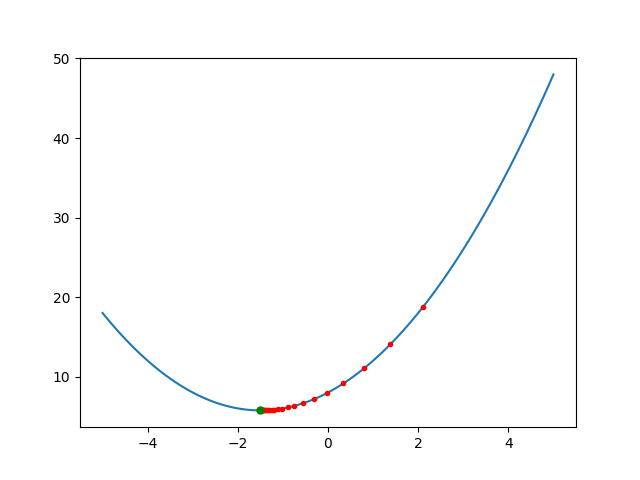

Minimum value of 5.750000146549363 obtained at x = -1.499617182337214


In [6]:
xbase, ybase, plotx, ploty = graddesc(f1, f1d, 3, 0.1, -5, 5)

## Animation:

#### Disclaimer for this animation, and all animations that follow: Make sure to not run multiple animations simultaneously. Wait for animation to get over before running successive cells. If tornado errors appear, rerun the cell. If it does not go away, or if animation glitches, restart kernel and run only relevant cells. 

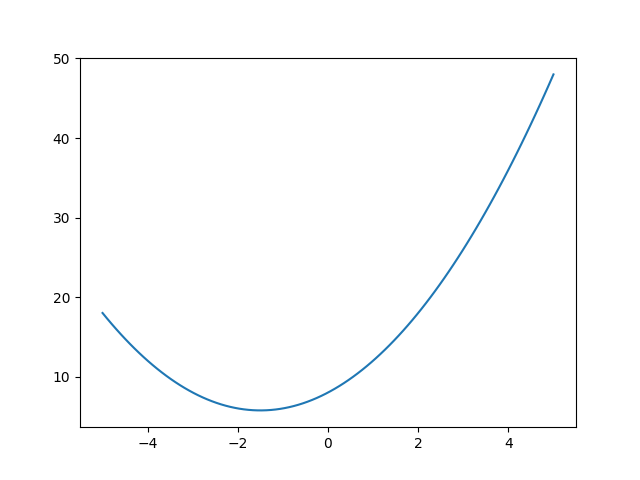

In [7]:
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
lnall,  = ax.plot([], [], 'ro', markersize = 2)
lngood, = ax.plot([], [], 'go', markersize=5)

def onestepderiv(frame):
    global plotx, ploty # using the point progression arrays generated in the above cell
    lnall.set_data(plotx[:frame], ploty[:frame]) # We plot the data upto the current frame number. This way, we add in one point every time
    lngood.set_data(plotx[frame-1], ploty[frame-1]) # Plots final point, i.e. best value upto that iteration
    # return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(1, len(plotx)), interval=1000, repeat=False)
# print("done!")
plt.show()

## Function 5: 1D Trigonometric

Minimum value of -4.045412051479521 obtained at x = 1.6616649303127164


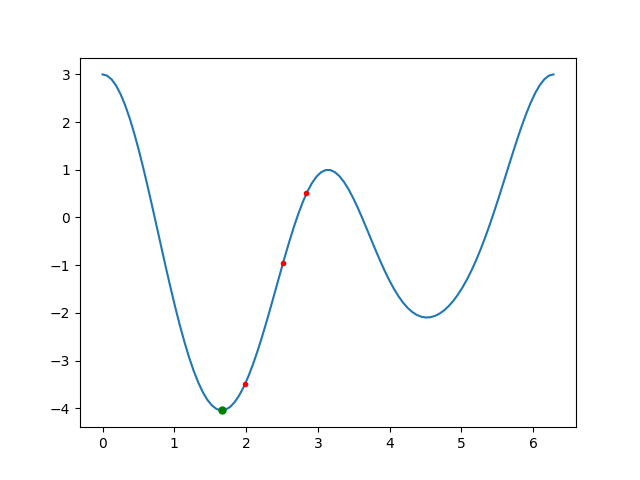

Minimum value of -4.045412051479521 obtained at x = 1.6616649303127164


In [8]:
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
def f5d(x):
    return 4*cos(x)**3*(-sin(x)) - 3*sin(x)**2*cos(x) -8*sin(x)*cos(x) - sin(x)

xmin2 = graddescfind(f5, f5d, 3, 0.1)
xbase, ybase, plotx, ploty = graddesc(f5, f5d, 3, 0.1, 0, 2*pi)


## Animation

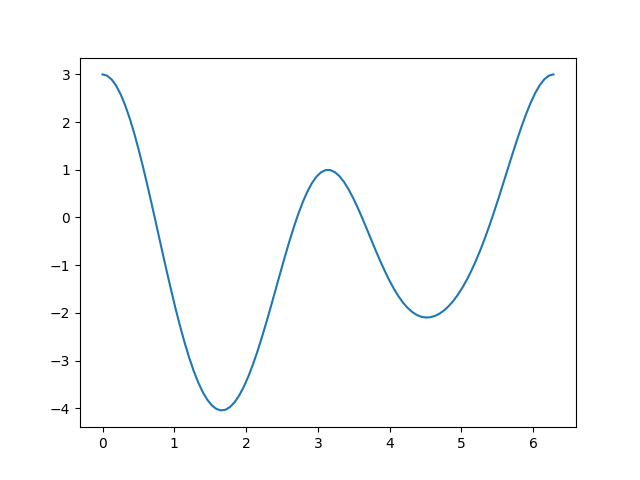

In [9]:
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
lnall,  = ax.plot([], [], 'ro', markersize = 2)
lngood, = ax.plot([], [], 'go', markersize=5)

def onestepderiv(frame):
    global plotx, ploty
    lnall.set_data(plotx[:frame], ploty[:frame])
    lngood.set_data(plotx[frame-1], ploty[frame-1])
    # return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(1, len(plotx)), interval=1000, repeat=False)
# print("done!")
plt.show()

Now, we define another function, `twograddescfind`, which performs gradient descent for functions with 2 variables. 

In [10]:
def twograddescfind(func, derix, deriy, start, alpha): # assuming derix is the partial derivative of the first variable, x, and deriy is the partial derivative of y. They must be passed correspondingly
    bestval = np.array(start)    
    start = np.array(start)
    bestvals = start    
    # Learning rate 
    lr = alpha
    prev = np.array([10000.0]*2)
    curr = start
    best = curr
    count = 0
    while True:
        prev = curr.copy()
        curr[0] = best[0] - lr*derix(best[0], best[1]) # We use partial derivatives instead of derivatives in the update equation for multivariable functions
        curr[1] = best[1] - lr*deriy(best[0], best[1]) 
        best = curr
        z = func(curr[0], curr[1])
        dist = np.linalg.norm(prev - best)
        if dist < 0.01*alpha:
            break
    print(f"Min value of function = {z} at x, y = {curr}")
    return(best) # returns values of independent variables at minima

`twograddesc` generates point progression arrays and plots them, as demonstrated below:

In [11]:
def twograddesc(func, derix, deriy, start, alpha, rangx, rangy):
    xbase = np.linspace(float(rangx[0]), float(rangx[1]), 100)
    ybase = np.linspace(float(rangy[0]), float(rangy[1]), 100)
    bestval = np.array(start)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    xbase, ybase = np.meshgrid(xbase, ybase)
    zbase = func(xbase, ybase)
    ax.plot_surface(xbase, ybase, zbase, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    # return(0)
    xall, yall, zall = [], [], []
    lnall,  = ax.plot([], [], [], 'ro')
    lngood, = ax.plot([], [], [], 'go', markersize=10)
    
    start = np.array(start)
    bestvals = start    
    # Learning rate 
    lr = alpha
    prev = np.array([10000.0]*2)
    curr = start
    best = curr
    count = 0
    while True:
        prev = curr.copy()
        curr[0] = best[0] - lr*derix(best[0], best[1]) 
        curr[1] = best[1] - lr*deriy(best[0], best[1]) 
        best = curr
        z = func(curr[0], curr[1])
        xall.append(best[0])
        yall.append(best[1])
        zall.append(z)
        dist = np.linalg.norm(prev - best)
        if dist < 0.01*alpha:
            lngood, = ax.plot([best[0]], [best[1]], [z], 'go', markersize=10)
            # print(count)
            break
        # count += 1
    ax.scatter(xall, yall, zall, c='red')    
    plt.show()
    print(f"Min value of function = {z} at x, y = {curr}")
    return(xbase, ybase, zbase, xall, yall, zall)

## Function 3: 2D polynomial

Min value of function = 2.000339282758148 at x, y = [3.86428106 1.99999745]


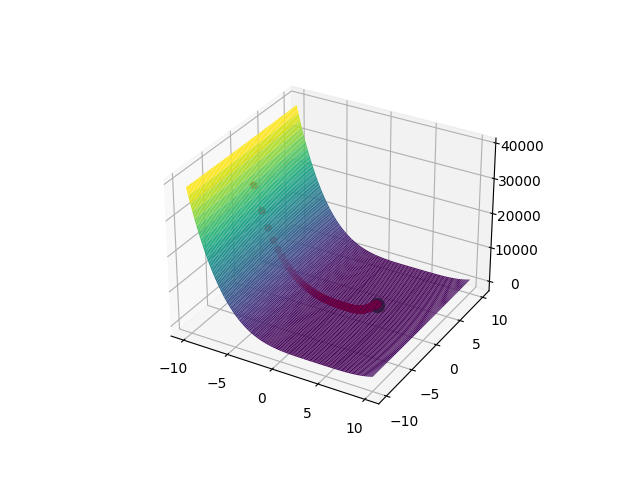

Min value of function = 2.000339282758148 at x, y = [3.86428106 1.99999745]


In [14]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

best1 = twograddescfind(f3, df3_dx, df3_dy, [-10.0, 0.0], 0.0001)
xbase1, ybase1, zbase1, plotx1, ploty1, plotz1 = twograddesc(f3, df3_dx, df3_dy, [-10.0, 0.0], 0.0001, xlim3, ylim3)

## Animation:

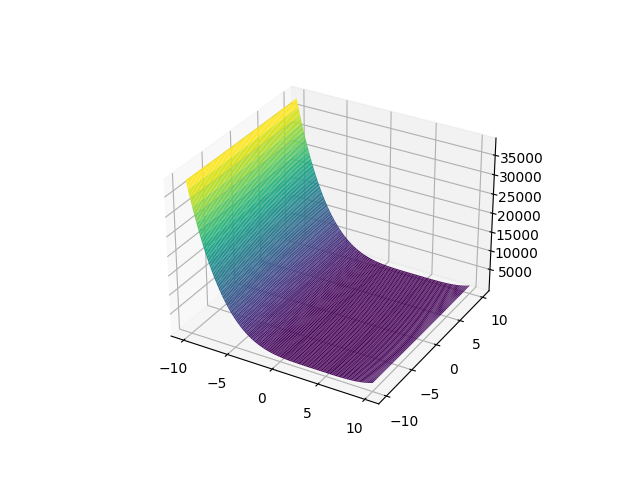

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xbase1, ybase1, zbase1, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
xall, yall, zall = [], [], []
lnall,  = ax.plot([], [], [], 'ro')
lngood, = ax.plot([], [], [], 'go', markersize=10)

def onestepderiv(frame):
    global plotx1, ploty1, plotz1
    ax.scatter(plotx1[-1], ploty1[-1], plotz1[-1], s = 50, c = 'green')
    # lngood.set_data(plotx1[frame-1], ploty1[frame-1], plotz1[frame-1])
    ax.scatter(plotx1[:frame], ploty1[:frame], plotz1[:frame], c = 'red')
    # return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=[i for i in range(1, len(plotx1))], interval=100, repeat=False)
# # print("done!")
plt.show()

## Function 4:

Min value of function = -0.9999179308570785 at x, y = [-1.55538499 -1.55913137]


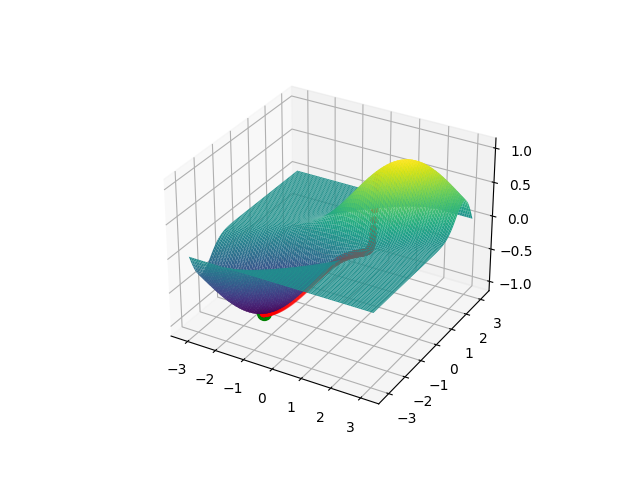

Min value of function = -0.9999179308570785 at x, y = [-1.55538499 -1.55913137]


In [14]:
xlim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)

best2 = twograddescfind(f4, f4_dx, f4_dy, [1.0, 1.0], 0.1)
xbase2, ybase2, zbase2, plotx2, ploty2, plotz2 = twograddesc(f4, f4_dx, f4_dy, [1.0, 1.0], 0.1, xlim4, xlim4)

## Animation: 
(takes a while to run)

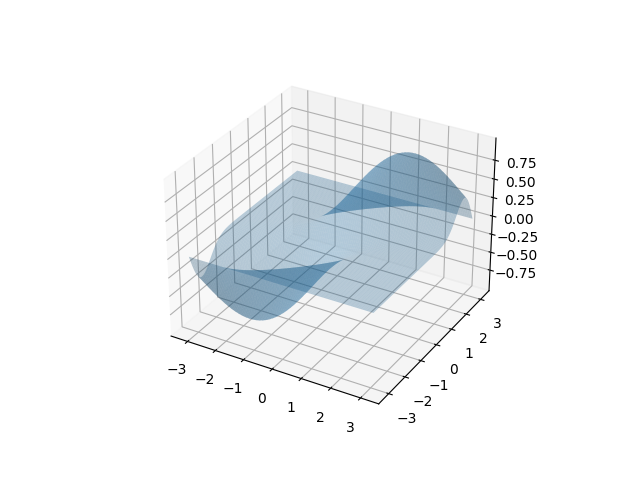

In [15]:
fig1 = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.plot_surface(xbase2, ybase2, zbase2, rstride=1, cstride=1, edgecolor='none', alpha = 0.3)

def onestepderiv2(frame):
    global plotx2, ploty2, plotz2
    ax1.scatter(plotx2[-1], ploty2[-1], plotz2[-1], s = 50, c = 'green')
    ax1.scatter(plotx2[:int(frame)], ploty2[:int(frame)], plotz2[:int(frame)], c = 'red')
    
ani= FuncAnimation(fig1, onestepderiv2, frames= [i for i in range(len(plotx2))] , interval=10, repeat=False)
plt.show()

## General input functions and gradient descent for n variables:

My code assumes the input function is given in the following format: 

- `multivarnew` is the function itself. Please change the function to relevant function in the return statement
- all the `dfdx` functions are the derivatives with respect to different variables. Please change function in return statement, and send them in the correct variable correspondence order to the gradient descent function. 
- `multigraddesc` takes the function, start, learning rate and all gradient functions as input, and returns values of independent variables at minima
    

In [16]:
def multivarnew(xvals):
    global varilist
    for i in range(len(varilist)):
        v = varilist[i]
        s = f"{v}={xvals[i]}"
        exec(s, globals(), globals())        
    return(x**2 + y**2 + K**2 + 7 )  ## enter function here    

In [17]:
def dfdx1(xvals):
    global varilist
    for i in range(len(varilist)):
        v = varilist[i]
        s = f"{v}={xvals[i]}"
        exec(s, globals(), globals())        
    return(2*x)  ## enter function here    

In [18]:
def dfdx2(xvals):
    global varilist
    for i in range(len(varilist)):
        v = varilist[i]
        s = f"{v}={xvals[i]}"
        exec(s, globals(), globals())        
    return(2*y)  ## enter function here    

In [19]:
def dfdx3(xvals):
    global varilist
    for i in range(len(varilist)):
        v = varilist[i]
        s = f"{v}={xvals[i]}"
        exec(s, globals(), globals())        
    return(2*K)  ## enter function here    

In [20]:
def multigraddesc(func, start, alpha, *args): 
    global varilist
    start = np.array(start)  
    # Learning rate 
    lr = alpha
    prev = np.array([10000.0]*len(start))
    curr = start
    while True:
        prev = curr.copy()
        temp = curr.copy()
        for i in range(len(curr)):
            curr[i] = temp[i] - lr*args[i](temp)
        z = func(curr)
        dist = np.linalg.norm(prev - curr)
        if dist < 0.01*alpha:
            break
    print(f"Min value of function = {z} at {varilist} = {curr}")
    return(curr)

Sample function: x^2 + y^2 + K^2 + 7

In [21]:
varilist = ['x', 'y', 'K']
multigraddesc(multivarnew, [2.0, 2.0, 1.0], 0.1, dfdx1, dfdx2, dfdx3)

Min value of function = 7.0000137924598675 at ['x', 'y', 'K'] = [0.00247588 0.00247588 0.00123794]


array([0.00247588, 0.00247588, 0.00123794])

## A method to generate derivative:

I have made use of the symbolic python library, `sympy`, to find partial derivatives of any multivariable function with respect to all its variables.

In [22]:
from sympy import Symbol, Derivative, diff
from sympy import *
from sympy import pi

In [ ]:
def multigraddescHARD(func, deri, start, alpha):
    start = np.array(start)
    bestvals = start    
    # Learning rate 
    lr = alpha
    prev = np.array([10000.0]*len(start))
    curr = start
    bestx = curr
    while True:
        prev = curr.copy()
        curr = bestx - lr*deri(bestx)[1] # deri(bestx) will generate an array of the derivative values of variables, in the same order as specified in varilist (global)
        bestx = curr.copy()
        y = func(curr)
        # count = 0
        if np.linalg.norm(prev - bestx) < 0.01*alpha:
            break
    return(bestx)

In [14]:
def multivarnew(xvals):
    global varilist
    for i in range(len(varilist)):
        v = varilist[i]
        s = f"{v}={xvals[i]}"
        exec(s, globals(), globals())        
    return(cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1)  ### enter function here    

In [15]:
def multideri(xval):
    global varilist
    derivlist = []
    derivvals = []
    derivs = []
    
    for i in range(len(varilist)):
        v = varilist[i]
        s2 = f"{v}=Symbol({repr(varilist[i])})"
        exec(s2, globals(), globals()) # executing the strings that define all our variables as symbols for sympy
        
    function = cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1 # change function here
    sfinal = "subs={"
    
    for i in range(len(varilist)):
        v = varilist[i]
        s3 = f"pd=diff({function},{v})" 
        exec(s3, globals(), globals()) # executing code to find partial derivative w.r.t. each variable, and storing the expressions in a list, derivlists
        derivlist.append(pd)
        # print(pd)
        s4 = "pd.doit()"
        exec(s4, globals(), globals())
        sfinal += f"{v}:{xval[i]},"
        
    sfinal = sfinal[:len(sfinal)-1] + '}'

    for i in range(len(derivlist)):
        v = derivlist[i]
        # print(v)
        try:
            s5 = float(v)
        except:
            s5 = f"({v}).evalf(10," + sfinal + ")"
        derivvals.append(s5) # list of strings for evaluating numerical value of each derivative equation for current variable values
        
    for q in derivvals:
        try:
            temp = eval(q)
        except:
            temp = q
        temp = float(temp) # evaluating the string defined above to find numerical derivative value 
        derivs.append(temp) # list of numerical derivative values corresponding to the variable order in varilist
    
    return derivlist, np.array(derivs)
    # return()

In [17]:
# sample : cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1 . Change all the relevant places to this function
varilist = ['x']
bestval = multigraddescHARD(multivarnew, multideri, [3.0], 0.001)
print(f"At minima, values of {varilist} : {bestval}")

At minima, values of ['x'] : [1.66255872]


As an example of derivative generation, here is what we return from multideri:
- the derivatives as a list
- the numerical values of the derivative at that point

In [18]:
print(varilist, multideri([-10]))

['x'] ([-3*sin(x)**2*cos(x) - 4*sin(x)*cos(x)**3 - 8*sin(x)*cos(x) - sin(x)], array([5.13825396]))
